En este script se revisan los fundamentos basico para un primer vistazo a los datos y limpieza (duplicados,NaN,Caracteres,etc)

    -Explorando los datos
    -Tablas Basicas y Separacion por Caracteres
    -Concatenado de Datos
    -Tipos de datos y Limpieza Basica

# Parte 1: Exploracion de los datos

In [1]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('C:/Users/Finanzas/Downloads/Proyectos_IFisica-master/Publicaciones.csv', encoding='latin-1')
df1.head()

,items.id,items.label,items.authors,items.journal,items.country,items.year,items.date,items.month,items.url
0,11609,Tablas de Energía Vs Rigidez Magnética para 3He,Barragan-Vidal A,Revista Mexicana de Física,México,1959,Jan 1959,Jan 1959,NaN
1,10536,Resonancia de 18F por bombardeo de 16O con d...,"G. Lopez, F. Alba, M.E. Ortiz",Revista Mexicana de Física,México,1959,Jan 1959,Jan 1959,NaN
2,10538,Tablas de Valores de Momentos Angulares y Cuad...,Barragan-Vidal A,Revista Mexicana de Física,México,1960,1960,1960,NaN
3,10537,Q-values of Nuclear Reactions in Light Element...,"M. Mazari, R. Dominguez, A. Jaidar, J. Rickard...",Edited by H. E. Duckwort. University of T...,Estados Unidos de América,1960,1960,1960,NaN
4,10539,Determinación de las características angulares...,M. E. Ortiz,Revista Mexicana de Física,México,1961,1961,1961,NaN


Funciones basicas para hechar un primer vistazo a los datos.

In [340]:
print('Columnas : ', df1.keys())

print('Dimensiones: ', df1.shape)

print('Estructura de datos : ', df1.info())

Count = pd.DataFrame(df1['items.year'].value_counts(dropna=False))
print('Publicaciones : ', Count.head(10))

Count.describe()

Columnas :  Index(['items.id', 'items.label', 'items.authors', 'items.journal',
       'items.country', 'items.year', 'items.date', 'items.month',
       'items.url'],
      dtype='object')
Dimensiones:  (3979, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3979 entries, 0 to 3978
Data columns (total 9 columns):
items.id         3979 non-null int64
items.label      3979 non-null object
items.authors    3979 non-null object
items.journal    3979 non-null object
items.country    3979 non-null object
items.year       3979 non-null int64
items.date       3979 non-null object
items.month      3979 non-null object
items.url        3391 non-null object
dtypes: int64(2), object(7)
memory usage: 279.9+ KB
Estructura de datos :  None
Publicaciones :        items.year
2016         238
2006         227
2005         226
2001         223
2000         220
2002         213
2008         206
2015         205
2007         205
2014         204


,items.year
count,54.000000
mean,73.685185
std,91.712394
min,1.000000
25%,4.250000
50%,17.500000
75%,190.000000
max,238.000000


Graficas exploratoria respecto al numero de Publicaciones

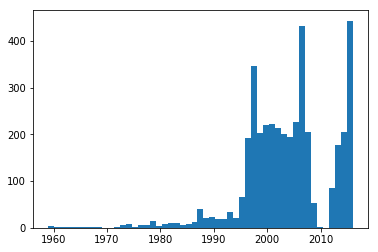

In [341]:
#Histograma por año
import matplotlib.pyplot as plt

plt.hist(df1['items.year'], bins='auto')
plt.show()

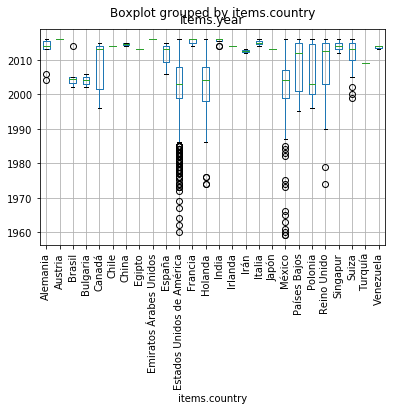

In [342]:
#Comparativo de Publicaciones por pais
df1.boxplot(column = 'items.year', by = 'items.country', rot = 90)

# Parte 2: Tablas basicas y separacion de caracteres

In [343]:
#Agrupar columnas en filas
iris = pd.read_csv("C:/Users/Finanzas/Documents/GitHub/iris.csv")

print(iris.head(2))
#Funcion melt nos permite agrupar las columnas en filas, id_vars (Colocamos el valor id), 
#var_name (El nombre de la columna de valores)
#value_name (El nombre de la Columna que guardara los valores en filas)
iris_e = pd.melt(iris , id_vars = ['Species'], var_name='Tipo de Hoja', value_name='valores')
iris_e.head()

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa


,Species,Tipo de Hoja,valores
0,setosa,Sepal.Length,5.1
1,setosa,Sepal.Length,4.9
2,setosa,Sepal.Length,4.7
3,setosa,Sepal.Length,4.6
4,setosa,Sepal.Length,5.0


In [344]:
#Valores unicos de filas en Columnas

#La funcion pivot_table nos indica la columna que quiero dejar como unica.
#index(Dejo las columnas que quiero dejar Como valores)
#columns(Las columnas que deseo tener un mi nueva base)
#values(Los valores que deseo tener en mi nueva base)
iris_c = iris_e.pivot_table(index=['Species'], columns = 'Tipo de Hoja', values = 'valores')

print(iris_c) 


Tipo de Hoja  Petal.Length  Petal.Width  Sepal.Length  Sepal.Width
Species                                                           
setosa               1.462        0.246         5.006        3.428
versicolor           4.260        1.326         5.936        2.770
virginica            5.552        2.026         6.588        2.974


In [345]:
#Podemos ver que nos queda especificado un Indice Jerarquico Species
print(iris_c.index)
#Para evitar los Indices Jerarquicos y enumerar los datos.
iris_c = iris_c.reset_index()
iris_c.head()

Index(['setosa', 'versicolor', 'virginica'], dtype='object', name='Species')


Tipo de Hoja,Species,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width
0,setosa,1.462,0.246,5.006,3.428
1,versicolor,4.260,1.326,5.936,2.770
2,virginica,5.552,2.026,6.588,2.974


In [346]:
#En caso de tener datos duplicados en la base agregamos el argumento aggfunc = np.mean para que junte los valores
iris_e.pivot_table(index = ['Species'], columns = 'Tipo de Hoja', values = 'valores', aggfunc=np.mean).reset_index()

Tipo de Hoja,Species,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width
0,setosa,1.462,0.246,5.006,3.428
1,versicolor,4.260,1.326,5.936,2.770
2,virginica,5.552,2.026,6.588,2.974


In [347]:
a =  df1.pivot_table(index = ['items.journal'],aggfunc=np.mean).reset_index()
a.head(10)

,items.journal,items.id,items.year
0,Journal of Physics Conference Series,18345.000000,2015.666667
1,#¿NOMBRE?,16929.000000,2013.000000
2,2004 NSTI Nanotechnology Conference and Trade ...,12630.000000,2004.000000
3,2D Materials,17378.500000,2014.500000
4,ACS Nano,17484.500000,2014.500000
5,ADVANCES IN TECHNOLOGY OF MATERIALS AND MATERI...,12919.000000,2006.000000
6,AIP 726 Series,12532.000000,2004.000000
7,AIP Advances,17369.000000,2014.666667
8,AIP Conference Proceedings,13180.666667,2006.133333
9,AIP Press Woodbury,11286.000000,1997.500000


Trabajaremos con el texto en las columnas, separando caracteres o tomandolos.

In [348]:
#Separacion de caracteres en columnas
print(df1.keys())
df1['Mes']  = df1['items.month'].str[:3]

df1['Año']  = df1['items.month'].str[3:]
df1.head()

Index(['items.id', 'items.label', 'items.authors', 'items.journal',
       'items.country', 'items.year', 'items.date', 'items.month',
       'items.url'],
      dtype='object')


,items.id,items.label,items.authors,items.journal,items.country,items.year,items.date,items.month,items.url,Mes,Año
0,11609,Tablas de Energía Vs Rigidez Magnética para 3He,Barragan-Vidal A,Revista Mexicana de Física,México,1959,Jan 1959,Jan 1959,NaN,Jan,1959
1,10536,Resonancia de 18F por bombardeo de 16O con d...,"G. Lopez, F. Alba, M.E. Ortiz",Revista Mexicana de Física,México,1959,Jan 1959,Jan 1959,NaN,Jan,1959
2,10538,Tablas de Valores de Momentos Angulares y Cuad...,Barragan-Vidal A,Revista Mexicana de Física,México,1960,1960,1960,NaN,196,0
3,10537,Q-values of Nuclear Reactions in Light Element...,"M. Mazari, R. Dominguez, A. Jaidar, J. Rickard...",Edited by H. E. Duckwort. University of T...,Estados Unidos de América,1960,1960,1960,NaN,196,0
4,10539,Determinación de las características angulares...,M. E. Ortiz,Revista Mexicana de Física,México,1961,1961,1961,NaN,196,1


In [349]:
df1['Texto'] = df1['items.authors'].str.split(',') #Guarda en un variable todo el texto y lo separa
df1['first.author'] = df1.Texto.str.get(0) #Toma el primer elemento de la lista
df1['second.author'] = df1.Texto.str.get(1) #Toma el segundo elemento de la lista
df1['three.author'] = df1.Texto.str.get(2) #Toma el segundo elemento de la lista
df1.head()

,items.id,items.label,items.authors,items.journal,items.country,items.year,items.date,items.month,items.url,Mes,Año,Texto,first.author,second.author,three.author
0,11609,Tablas de Energía Vs Rigidez Magnética para 3He,Barragan-Vidal A,Revista Mexicana de Física,México,1959,Jan 1959,Jan 1959,NaN,Jan,1959,[Barragan-Vidal A],Barragan-Vidal A,NaN,NaN
1,10536,Resonancia de 18F por bombardeo de 16O con d...,"G. Lopez, F. Alba, M.E. Ortiz",Revista Mexicana de Física,México,1959,Jan 1959,Jan 1959,NaN,Jan,1959,"[G. Lopez, F. Alba, M.E. Ortiz]",G. Lopez,F. Alba,M.E. Ortiz
2,10538,Tablas de Valores de Momentos Angulares y Cuad...,Barragan-Vidal A,Revista Mexicana de Física,México,1960,1960,1960,NaN,196,0,[Barragan-Vidal A],Barragan-Vidal A,NaN,NaN
3,10537,Q-values of Nuclear Reactions in Light Element...,"M. Mazari, R. Dominguez, A. Jaidar, J. Rickard...",Edited by H. E. Duckwort. University of T...,Estados Unidos de América,1960,1960,1960,NaN,196,0,"[M. Mazari, R. Dominguez, A. Jaidar, J. Ric...",M. Mazari,R. Dominguez,A. Jaidar
4,10539,Determinación de las características angulares...,M. E. Ortiz,Revista Mexicana de Física,México,1961,1961,1961,NaN,196,1,[M. E. Ortiz],M. E. Ortiz,NaN,NaN


#  Parte 3: Concatenado de datos


In [350]:
print(df1.shape)
df2 = df1 #Creamos otra base como ejemplo

#Concatenado por filas y con las mismas columnas
df_concat = pd.concat([df1,df2])
df_concat.shape

(3979, 15)


(7958, 15)

In [351]:
#Concatenado por columnas, en caso de no tener las mimas columnas.
df_concat = pd.concat([df1,df2], axis = 1)
df_concat.shape

(3979, 30)

Antes de continuar, haremos un parentesis para leer archivo csv de una ruta

In [352]:
#Conocer los archivos que se encuentran en una ruta especifica
import glob 

pattern = '*.csv'
archivo_csv = glob.glob(pattern)
print(archivo_csv)

['iris.csv', 'mtcars.csv']


In [353]:
#Leyendo todos los archivos e irlos guardando
Union = []

for csv in archivo_csv:
    df = pd.read_csv(csv)
    Union.append(df)
Union = pd.concat(Union)

print(Union.shape)
print(Union.head())
print(Union.tail())

(183, 17)
  Autos  Petal.Length  Petal.Width  Sepal.Length  Sepal.Width Species  am  \
0   NaN           1.4          0.2           5.1          3.5  setosa NaN   
1   NaN           1.4          0.2           4.9          3.0  setosa NaN   
2   NaN           1.3          0.2           4.7          3.2  setosa NaN   
3   NaN           1.5          0.2           4.6          3.1  setosa NaN   
4   NaN           1.4          0.2           5.0          3.6  setosa NaN   

   carb  cyl  disp  drat  gear  hp  mpg  qsec  vs  wt  
0   NaN  NaN   NaN   NaN   NaN NaN  NaN   NaN NaN NaN  
1   NaN  NaN   NaN   NaN   NaN NaN  NaN   NaN NaN NaN  
2   NaN  NaN   NaN   NaN   NaN NaN  NaN   NaN NaN NaN  
3   NaN  NaN   NaN   NaN   NaN NaN  NaN   NaN NaN NaN  
4   NaN  NaN   NaN   NaN   NaN NaN  NaN   NaN NaN NaN  
             Autos  Petal.Length  Petal.Width  Sepal.Length  Sepal.Width  \
28  Ford Pantera L           NaN          NaN           NaN          NaN   
29    Ferrari Dino           NaN       

Concatenado de datos en caso de tener una columna llave.

In [354]:
#Fusion de datos 1a1
#1 a muchos
#muchos a muchos
#Union de datos con columnas llaves
mtcars = pd.read_csv('mtcars.csv')
test = pd.merge(left=iris, right=mtcars, left_on='Species', right_on='Autos')
test.head(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Autos,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,5.1,3.5,1.4,0.2,setosa,setosa,21.0,6,160.0,110,3.9,2.62,21.0,6,160,110,3.9
1,4.9,3.0,1.4,0.2,setosa,setosa,21.0,6,160.0,110,3.9,2.62,21.0,6,160,110,3.9
2,4.7,3.2,1.3,0.2,setosa,setosa,21.0,6,160.0,110,3.9,2.62,21.0,6,160,110,3.9
3,4.6,3.1,1.5,0.2,setosa,setosa,21.0,6,160.0,110,3.9,2.62,21.0,6,160,110,3.9
4,5.0,3.6,1.4,0.2,setosa,setosa,21.0,6,160.0,110,3.9,2.62,21.0,6,160,110,3.9



# Parte 4: Tipos de Datos y Limpieza Basica

Tipos de Datos (y Cohercion)

In [390]:
#Cambio del tipos de datos
print(test.dtypes)
test.Species = test.Species.astype('category') #Tienen formato object
test.Autos = test.Autos.astype('category')
test.cyl = test.cyl.astype('category') #Cambiamo un valor numerico a category(Factor)
test.dtypes

Sepal.Length     float64
Sepal.Width      float64
Petal.Length     float64
Petal.Width      float64
Species         category
Autos           category
mpg              float64
cyl                int64
disp             float64
hp                 int64
drat             float64
wt               float64
qsec             float64
vs                 int64
am                 int64
gear               int64
carb             float64
dtype: object


Sepal.Length     float64
Sepal.Width      float64
Petal.Length     float64
Petal.Width      float64
Species         category
Autos           category
mpg              float64
cyl             category
disp             float64
hp                 int64
drat             float64
wt               float64
qsec             float64
vs                 int64
am                 int64
gear               int64
carb             float64
dtype: object

In [391]:
test['cyl'] = pd.to_numeric(test['cyl'], errors='coerce') #Volvemos el valor categorico a numerico
print(test.dtypes)
test.head() #Generara un error, pero en caso de haber tenido texto como numero esta bien.

Sepal.Length     float64
Sepal.Width      float64
Petal.Length     float64
Petal.Width      float64
Species         category
Autos           category
mpg              float64
cyl                int64
disp             float64
hp                 int64
drat             float64
wt               float64
qsec             float64
vs                 int64
am                 int64
gear               int64
carb             float64
dtype: object


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Autos,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,5.1,3.5,1.4,0.2,setosa,setosa,21.0,6,160.0,110,3.9,2.62,21.0,6,160,110,3.9
1,4.9,3.0,1.4,0.2,setosa,setosa,21.0,6,160.0,110,3.9,2.62,21.0,6,160,110,3.9
2,4.7,3.2,1.3,0.2,setosa,setosa,21.0,6,160.0,110,3.9,2.62,21.0,6,160,110,3.9
3,4.6,3.1,1.5,0.2,setosa,setosa,21.0,6,160.0,110,3.9,2.62,21.0,6,160,110,3.9
4,5.0,3.6,1.4,0.2,setosa,setosa,21.0,6,160.0,110,3.9,2.62,21.0,6,160,110,3.9


Limpieza de expresiones regulares o validacion de formato de caracteres.

In [357]:
import re

# Definicion del formato que necsitamos que se respete
prog = re.compile('\d{3}-\d{3}-\d{4}')

# Macheo del formato definido, para validar el formato deseado
result = prog.match('123-456-7890')
print(bool(result))

#En caso de no cumplirse el formato establecido regresa False
result = prog.match('1123-456-7890')
print(bool(result))

True
False


In [358]:
#Extraccion de numeros en una cadena de caracteres
matches = re.findall('\d', 'the recipe calls for 6 strawberries and 2 bananas')

print(matches)

['6', '2']


In [359]:
# Todo en una solo linea, validando el formato deseado
pattern1 = bool(re.match(pattern='\d{3}-\d{3}-\d{4}', string='123-456-7890'))
print(pattern1)

pattern2 = bool(re.match(pattern='\$\d*\.\d{2}', string='$123.45'))
print(pattern2)

pattern3 = bool(re.match(pattern='\w*', string='Australia'))
print(pattern3)

True
True
True


In [360]:
#Funcion que agrega un codigo dependiendo el valor en la columna Species
def Codigo(Resumen):

    # Return 1 if sex_value is 'Male'
    if Resumen == 'versicolor':
        return 0
    
    # Return 0 if sex_value is 'Female'    
    elif Resumen == 'virginica':
        return 1
    
    elif Resumen == 'setosa':
        return 2
    
    # Return np.nan    
    else:
        return np.nan

# Funcion apply para agragarlo a cada fila
iris['Codigo_Species'] = iris.Species.apply(Codigo)

print(iris.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species  \
0           5.1          3.5           1.4          0.2  setosa   
1           4.9          3.0           1.4          0.2  setosa   
2           4.7          3.2           1.3          0.2  setosa   
3           4.6          3.1           1.5          0.2  setosa   
4           5.0          3.6           1.4          0.2  setosa   

   Codigo_Species  
0               2  
1               2  
2               2  
3               2  
4               2  


Las funciones lambda son utiles para definir funciones cortas y no tener que crearlas.

In [361]:
#Funciones Lambda para definir funciones cortas.
# Usando una funcion lambda y replace
#Remplazamos las comas por & en la columna items.authors de la base df1
df1['Nueva_autores'] = df1['items.authors'].apply(lambda x: x.replace(',', ' & '))

# Extraccion de valores numericos
df1['Nuevo_Año'] = df1['items.date'].apply(lambda x: re.findall('\d+', x))

print(df1.head())

   items.id                                        items.label  \
0     11609    Tablas de Energía Vs Rigidez Magnética para 3He   
1     10536  Resonancia de  18F por bombardeo de  16O con d...   
2     10538  Tablas de Valores de Momentos Angulares y Cuad...   
3     10537  Q-values of Nuclear Reactions in Light Element...   
4     10539  Determinación de las características angulares...   

                                       items.authors  \
0                                   Barragan-Vidal A   
1                      G. Lopez, F. Alba, M.E. Ortiz   
2                                   Barragan-Vidal A   
3  M. Mazari, R. Dominguez, A. Jaidar, J. Rickard...   
4                                        M. E. Ortiz   

                                       items.journal  \
0                         Revista Mexicana de Física   
1                         Revista Mexicana de Física   
2                         Revista Mexicana de Física   
3  Edited by  H.  E.  Duckwort.  Universit

Eliminacion de datos duplicados, validacion de NaN y remplazo de NaN.

In [392]:
#Eliminar valores duplicados
tracks = df1[['items.authors','items.journal']]

print(tracks.info()) #Nos da la informacion de la tabla actual

tracks_no_duplicates = tracks.drop_duplicates()

print(tracks_no_duplicates.info()) #Info al haber quitado datos duplicados


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3979 entries, 0 to 3978
Data columns (total 2 columns):
items.authors    3979 non-null object
items.journal    3979 non-null object
dtypes: object(2)
memory usage: 62.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3761 entries, 0 to 3978
Data columns (total 2 columns):
items.authors    3761 non-null object
items.journal    3761 non-null object
dtypes: object(2)
memory usage: 88.1+ KB
None


In [393]:
#Remplazo de valores Nulos o nan
#Calculamos la media de la columna disp de la base Union para remplazar los NA
media_disp = Union.disp.mean()

#Con la funcion fillna sustiuimos los valores
Union['disp'] = Union.disp.fillna(media_disp)

print(Union.head())

#Podemos ver que no existe ningun valor NaN en la columna disp
print(Union.info())

  Autos  Petal.Length  Petal.Width  Sepal.Length  Sepal.Width Species  am  \
0   NaN           1.4          0.2           5.1          3.5  setosa NaN   
1   NaN           1.4          0.2           4.9          3.0  setosa NaN   
2   NaN           1.3          0.2           4.7          3.2  setosa NaN   
3   NaN           1.5          0.2           4.6          3.1  setosa NaN   
4   NaN           1.4          0.2           5.0          3.6  setosa NaN   

   carb  cyl        disp  drat  gear  hp  mpg  qsec  vs  wt  
0   NaN  NaN  228.578788   NaN   NaN NaN  NaN   NaN NaN NaN  
1   NaN  NaN  228.578788   NaN   NaN NaN  NaN   NaN NaN NaN  
2   NaN  NaN  228.578788   NaN   NaN NaN  NaN   NaN NaN NaN  
3   NaN  NaN  228.578788   NaN   NaN NaN  NaN   NaN NaN NaN  
4   NaN  NaN  228.578788   NaN   NaN NaN  NaN   NaN NaN NaN  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 0 to 32
Data columns (total 17 columns):
Autos           33 non-null object
Petal.Length    150 non-nu

In [394]:
# Afirmacion para ver si no existen valores perdidos
df1.notnull().head() #Si es False significa que ese Valor es NaN

,items.id,items.label,items.authors,items.journal,items.country,items.year,items.date,items.month,items.url,Mes,Año,Texto,first.author,second.author,three.author,Nueva_autores,Nuevo_Año
0,True,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True
1,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True
3,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True


In [395]:
df1.notnull().all() #Contiene algunos NaN en las columnas

items.id          True
items.label       True
items.authors     True
items.journal     True
items.country     True
items.year        True
items.date        True
items.month       True
items.url        False
Mes               True
Año               True
Texto             True
first.author      True
second.author    False
three.author     False
Nueva_autores     True
Nuevo_Año         True
dtype: bool

In [396]:
df1.notnull().all().all() #La base contiene al menos un valor NaN

False

In [397]:
#De igual forma podemos hacer un test logico sobre los datos
#Ver si todos los valores son positivos
(df1 >= 0).head()

,items.id,items.label,items.authors,items.journal,items.country,items.year,items.date,items.month,items.url,Mes,Año,Texto,first.author,second.author,three.author,Nueva_autores,Nuevo_Año
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [398]:
#Validacion por columna
(df1 >= 0).head().all()

items.id         True
items.label      True
items.authors    True
items.journal    True
items.country    True
items.year       True
items.date       True
items.month      True
items.url        True
Mes              True
Año              True
Texto            True
first.author     True
second.author    True
three.author     True
Nueva_autores    True
Nuevo_Año        True
dtype: bool

In [399]:
#Validacion por toda la base
(df1 >= 0).head().all().all()

True